___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# Raisin Class Prediction

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

https://archive.ics.uci.edu/ml/datasets/Raisin+Dataset

# Import libraries

In [6]:
# libraries for EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
# import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
# cf.go_offline()
#To display the plots
%matplotlib inline

# sklearn library for machine learning algorithms, data preprocessing, and evaluation
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score

# yellowbrick library for visualizing the model performance
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import KElbowVisualizer 

from sklearn.pipeline import Pipeline
# to get rid of the warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Exploratory Data Analysis and Visualization

In [3]:
df = pd.read_excel("Raisin_Dataset.xlsx") # Reading the dataset

In [4]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


In [8]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [9]:
df.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


In [18]:
df_numeric = df.select_dtypes(exclude="O")

In [38]:
## boxplot çizzdir

<AxesSubplot:>

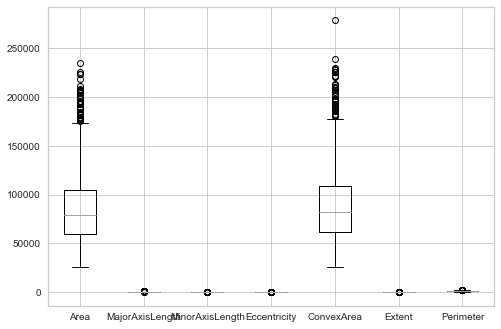

In [30]:
df.boxplot()

In [39]:
df.corr()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000


## Train | Test Split and Scaling

* for train_test_split use fallowing arguments:
    * train_size: 0.2
    * stratify: True
    * random_state: 10    
* Use StandardScaler to scale the data.

In [45]:
X = df.drop(columns="Class")
y = df.Class

In [49]:
def color_red(val):
    if val > 0.90 and val < 1:
        color = 'red'
    else:
        color = 'black'
    return f'color: {color}'


In [50]:
pd.DataFrame(X).corr().style.applymap(color_red)

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
Area,1.000000,0.932774,0.906650,0.336107,0.995920,-0.013499,0.961352
MajorAxisLength,0.932774,1.000000,0.728030,0.583608,0.945031,-0.203866,0.977978
MinorAxisLength,0.906650,0.728030,1.000000,-0.027683,0.895651,0.145322,0.827417
Eccentricity,0.336107,0.583608,-0.027683,1.000000,0.348210,-0.361061,0.447845
ConvexArea,0.995920,0.945031,0.895651,0.348210,1.000000,-0.054802,0.976612
Extent,-0.013499,-0.203866,0.145322,-0.361061,-0.054802,1.000000,-0.173449
Perimeter,0.961352,0.977978,0.827417,0.447845,0.976612,-0.173449,1.000000


In [56]:
print(df.Class.value_counts())
print()
print(df.Class.value_counts(normalize=True))

Kecimen    450
Besni      450
Name: Class, dtype: int64

Kecimen    0.5
Besni      0.5
Name: Class, dtype: float64


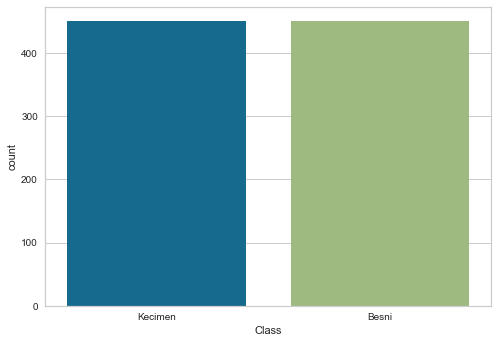

In [54]:
sns.countplot(x="Class", data=df);

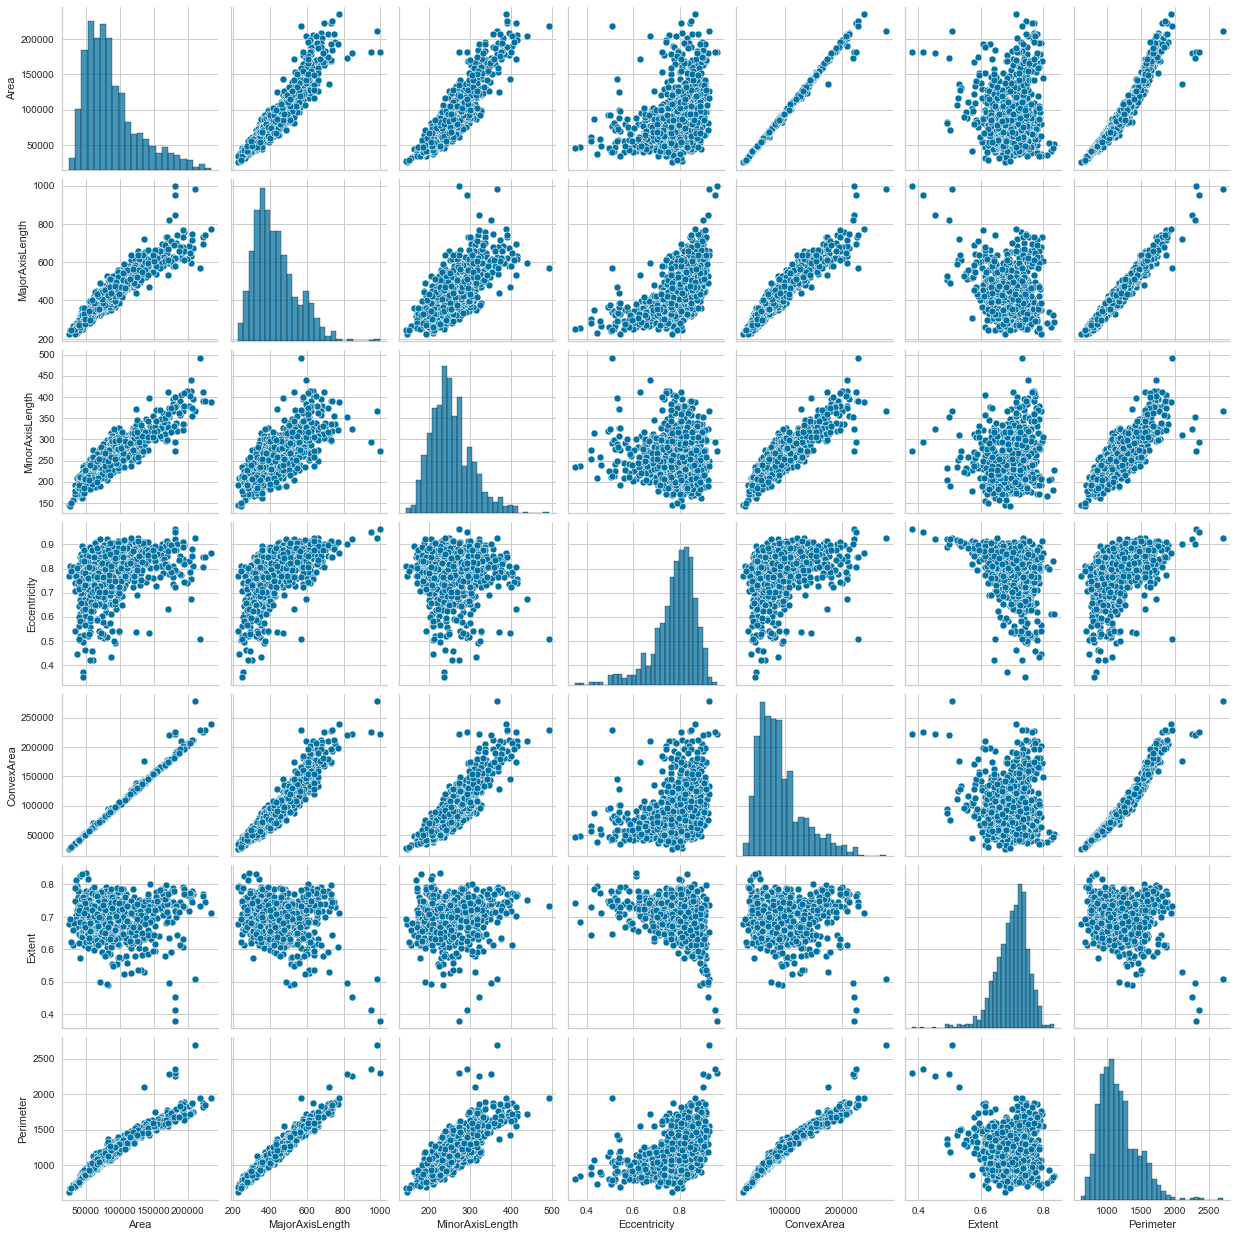

In [57]:
sns.pairplot(df);

In [59]:
fig = px.box(df, color="Class", color_discrete_map={"Kecimen":'#FF0000',"Besni":'#00FF00'})
fig.show()

In [60]:
df["Class"] = df["Class"].map({"Kecimen":0,"Besni":1}) # mapping the classes to 0 and 1

# Logistic Regression

* Train the model using the training set with the default parameters.

## Model Performance
*Check the accuracy of the model using the train and test set by given eval_metric function.

In [ ]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

### Cross Validate

* Use the cross_val_score function to evaluate the model using the train set.

### GridSearchCV
* Use the GridSearchCV function to find the best parameters for the model.

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

* Use the roc_curve function to calculate the ROC curve and compare logistic regression models with default and tuned parameters. 

## KNN (K-Nearest Neighbors)
* Train the model using the training set with the default parameters.

### Elbow Method for Choosing Reasonable K Values
* Use the elbow method to find the optimal number of neighbors.

### Scores by Various K Values
* Select some k values smaller and bigger than the optimal k value to see how the model performs.

### Cross Validate
* Use the cross_val_score function to evaluate the model using the train set. Use optimal k value which you found in the elbow method.


### Gridsearch Method for Choosing Reasonable K Values
* Use the GridSearchCV function to find the best parameters for the model. this method is brute force method to find the best parameters, and it takes a long time to run for KNN. You will get different k values because of you will use different parameters, and also gridsearch method tries to find minimum error. Sometimes it get larger k values for optimal but for  sake of reduce complexity we use the elbow method to find the optimal k value.

### Evaluating ROC Curves and AUC
*Use the roc_curve function to calculate the ROC curve and compare KNN models with default and tuned parameters.

# Conclusion 
* Write a short summary of your findings, and decide which model you will use and why.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___